                                   📊 E-Commerce Sales Analysis (SQL + Python + Power Bi)
🎯 Business Objective: 

    The objective of this analysis is to evaluate e-commerce sales performance and customer behavior in order to understand revenue concentration,          assess the reliability of key performance metrics, and identify operational and behavioral factors that influence revenue stability and                 customer value.

    SQL was used to validate data quality and compute core business metrics, while Python was used to analyze distributions, behavioral relationships,      and time-series trends that cannot be reliably captured through aggregated SQL queries alone.

❓ Key Business Questions Addressed:

        Is revenue evenly distributed across orders, or concentrated among a small number of high-value transactions?

        Are average order value metrics reliable, or distorted by extreme outliers?
         
        Are high-value purchases dependent on discount offers?

        Does delivery time have a meaningful impact on customer satisfaction?

        Are customer ratings a dependable indicator of customer spending behavior?

        How stable is revenue performance over time once short-term volatility is removed?

        Which device and payment method combinations contribute most significantly to total revenue?

        

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('Ecommerce.csv')
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,...,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Day
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,...,Debit Card,Mobile,4,14,True,8,5,2023.0,1.0,1.0
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,...,Credit Card,Mobile,11,3,True,3,3,2023.0,1.0,1.0
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,...,Credit Card,Mobile,7,8,True,5,2,2023.0,1.0,1.0
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,...,Credit Card,Mobile,8,10,False,1,4,2023.0,1.0,1.0
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,...,Cash on Delivery,Desktop,21,10,True,7,4,2023.0,1.0,1.0


In [12]:
df.isnull().sum()

Order_ID                       0
Customer_ID                    0
Date                        3003
Age                            0
Gender                         0
City                           0
Product_Category               0
Unit_Price                     0
Quantity                       0
Discount_Amount                0
Total_Amount                   0
Payment_Method                 0
Device_Type                    0
Session_Duration_Minutes       0
Pages_Viewed                   0
Is_Returning_Customer          0
Delivery_Time_Days             0
Customer_Rating                0
Year                        3003
Month                       3003
Day                         3003
dtype: int64

In [13]:
df.dropna(subset=['Product_Category'],inplace=True)

In [14]:
df.describe(include='all')

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,...,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Day
count,4986,4986,1983,4986.000000,4986,4986,4986,4986.000000,4986.000000,4986.000000,...,4986,4986,4986.000000,4986.000000,4986,4986.000000,4986.000000,1983.000000,1983.000000,1983.000000
unique,4986,4986,180,NaN,3,10,8,NaN,NaN,NaN,...,5,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,ORD_000902,CUST_00902,2024-05-01,NaN,Female,Istanbul,Sports,NaN,NaN,NaN,...,Credit Card,Mobile,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
freq,1,1,21,NaN,2485,1281,665,NaN,NaN,NaN,...,2004,2788,NaN,NaN,2980,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,35.021861,NaN,NaN,NaN,455.998161,2.221821,24.887734,...,NaN,NaN,14.559968,8.983554,NaN,6.491376,3.902327,2023.197176,6.483611,5.755421
std,NaN,NaN,NaN,11.081612,NaN,NaN,NaN,713.225553,1.399145,88.495641,...,NaN,NaN,8.649123,2.804590,NaN,3.459817,1.129475,0.397967,3.448132,3.599836
min,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,5.180000,1.000000,0.000000,...,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,2023.000000,1.000000,1.000000
25%,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,76.505000,1.000000,0.000000,...,NaN,NaN,8.000000,7.000000,NaN,4.000000,3.000000,2023.000000,3.000000,2.000000
50%,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,182.825000,2.000000,0.000000,...,NaN,NaN,13.000000,9.000000,NaN,6.000000,4.000000,2023.000000,6.000000,5.000000
75%,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,513.817500,3.000000,8.760000,...,NaN,NaN,19.000000,11.000000,NaN,8.000000,5.000000,2023.000000,9.000000,9.000000


In [15]:
df['Gender'].replace({'male':'Male','female':'Female'},inplace=True)
df['Age']=df['Age'].astype(int)
df['Quantity']=df['Quantity'].astype(int)


C:\Users\Deep\AppData\Local\Temp\ipykernel_3028\2160248617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'male':'Male','female':'Female'},inplace=True)


In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].dt.strftime('%m-%d-%y')
df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,...,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Year,Month,Day
0,ORD_001337,CUST_01337,01-01-23,27,Female,Bursa,Toys,54.28,1,0.00,...,Debit Card,Mobile,4,14,True,8,5,2023.0,1.0,1.0
1,ORD_004885,CUST_04885,01-01-23,42,Male,Konya,Toys,244.90,1,0.00,...,Credit Card,Mobile,11,3,True,3,3,2023.0,1.0,1.0
2,ORD_004507,CUST_04507,01-01-23,43,Female,Ankara,Food,48.15,5,0.00,...,Credit Card,Mobile,7,8,True,5,2,2023.0,1.0,1.0
3,ORD_000645,CUST_00645,01-01-23,32,Male,Istanbul,Electronics,804.06,1,229.28,...,Credit Card,Mobile,8,10,False,1,4,2023.0,1.0,1.0
4,ORD_000690,CUST_00690,01-01-23,40,Female,Istanbul,Sports,755.61,5,0.00,...,Cash on Delivery,Desktop,21,10,True,7,4,2023.0,1.0,1.0


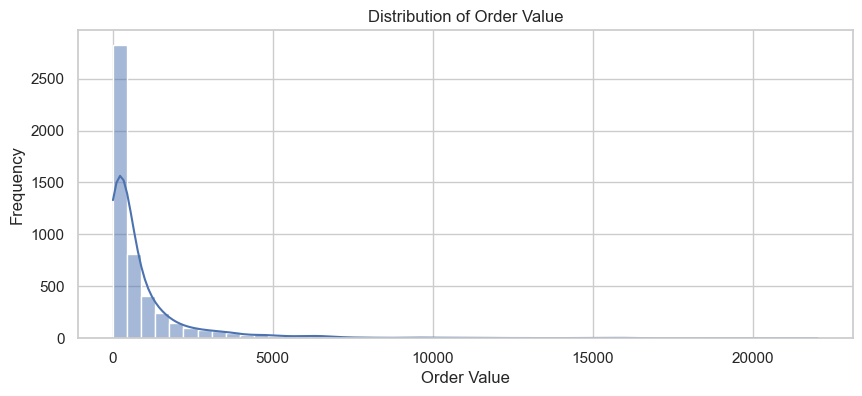

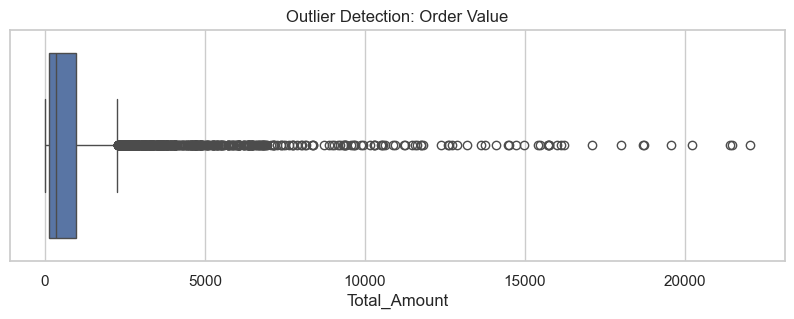

<Figure size 640x480 with 0 Axes>

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,4))
sns.histplot(df['Total_Amount'], bins=50, kde=True)
plt.title("Distribution of Order Value")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.savefig('Distribution of Order Value')
plt.show()

plt.figure(figsize=(10,3))
sns.boxplot(x=df['Total_Amount'])
plt.title("Outlier Detection: Order Value")
plt.savefig('Distribution of Order Value')
plt.show()
plt.savefig('Distribution of Order Value')

Insight:
--The order value distribution is heavily right-skewed, with the majority of orders concentrated at lower price ranges and a long tail of high-value purchases.

Why this matters:
--A small number of expensive orders disproportionately inflate average revenue metrics, making the mean order value unreliable as a representative KPI.

Business implication:
--Decision-making should rely on median, percentiles, or segmented analysis rather than averages alone. Revenue growth strategies should focus on increasing mid-range order frequency rather than depending on rare high-value transactions.

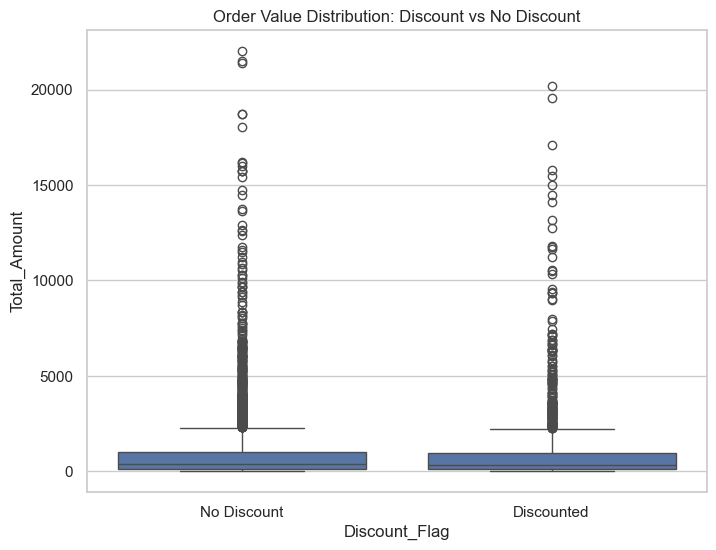

<Figure size 640x480 with 0 Axes>

In [18]:
df['Discount_Flag'] = df['Discount_Amount'].apply(
    lambda x: 'Discounted' if x > 0 else 'No Discount'
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Discount_Flag',
    y='Total_Amount'
)
plt.title("Order Value Distribution: Discount vs No Discount")
plt.show()
plt.savefig('Discount vs No Discount')

Why This Metric:
--This visualization compares the distribution of total order value between discounted and non-discounted purchases to assess whether discounts actually influence customer spending behavior. Order value is a core revenue metric that directly reflects the financial impact of pricing strategies.

Business implication: 
     --Optimize discount allocation by identifying scenarios where discounts do not increase spending.
       Support margin protection by avoiding unnecessary discounts for customers who purchase at similar values without incentives.

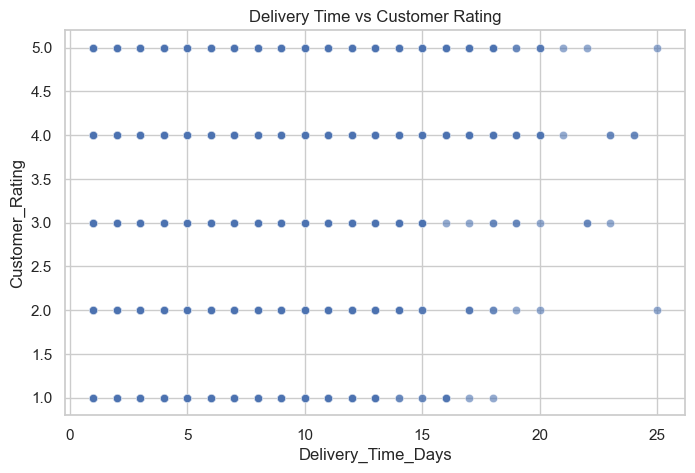

,Delivery_Time_Days,Customer_Rating
Delivery_Time_Days,1.000000,-0.011381
Customer_Rating,-0.011381,1.000000


In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='Delivery_Time_Days',
    y='Customer_Rating',
    alpha=0.6
)
plt.title("Delivery Time vs Customer Rating")
plt.show()

df[['Delivery_Time_Days','Customer_Rating']].corr()


Insight:
-- Customer ratings are spread across all delivery time ranges, with no strong visible downward trend as delivery time increases.

Why this matters:
--This indicates that delivery speed alone does not strongly determine customer satisfaction in this dataset.

Business implication:
--Improving delivery speed in isolation may not significantly improve ratings. Product quality, customer service, and post-purchase experience likely play a larger role in driving customer satisfaction.

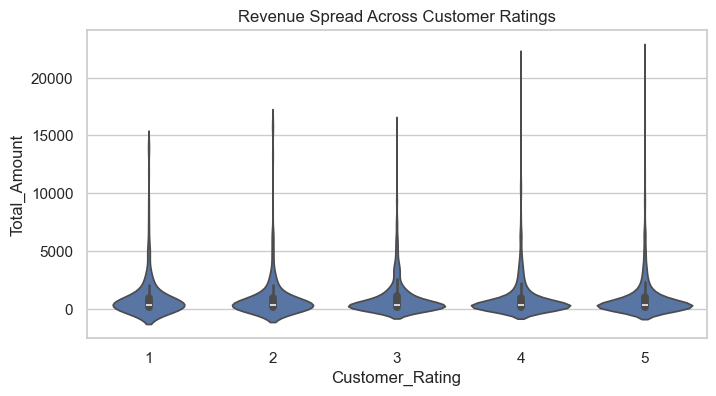

In [20]:
plt.figure(figsize=(8,4))
sns.violinplot(
    data=df,
    x='Customer_Rating',
    y='Total_Amount'
)
plt.title("Revenue Spread Across Customer Ratings")
plt.show()


Insight: --Revenue distributions overlap heavily across all rating levels, and high-value purchases exist even among low-rated orders.

Why this matters: --Customer satisfaction scores are not a reliable proxy for customer value or spending behavior.

Business implication: --Revenue-driven strategies should not prioritize only high-rating customers. Marketing and retention efforts should consider actual purchasing behavior rather than ratings alone.



In [21]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

snapshot_date = df['Date'].max()

rfm = df.groupby('Customer_ID').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'Order_ID': 'count',
    'Total_Amount': 'sum'
}).reset_index()

rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']
df.to_csv("woienw1.csv",index=False)
rfm.describe()


C:\Users\Deep\AppData\Local\Temp\ipykernel_3028\2683545701.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Recency,Frequency,Monetary
count,1983.000000,4986.0,4986.000000
mean,459.108422,1.0,984.047114
std,178.378391,0.0,1901.202164
min,0.000000,1.0,7.870000
25%,366.500000,1.0,122.512500
50%,485.000000,1.0,337.910000
75%,603.000000,1.0,980.085000
max,702.000000,1.0,22023.900000


Insight:
--Most customers have a frequency of 1, indicating predominantly one-time buyers. Monetary value shows high variance, with a small group of customers contributing very large lifetime value.

Why this matters:
--Revenue concentration among a small customer segment increases business risk and highlights weak retention.

Business implication:
-- The business should prioritize converting one-time buyers into repeat customers through loyalty programs, targeted offers, and improved onboarding experiences.

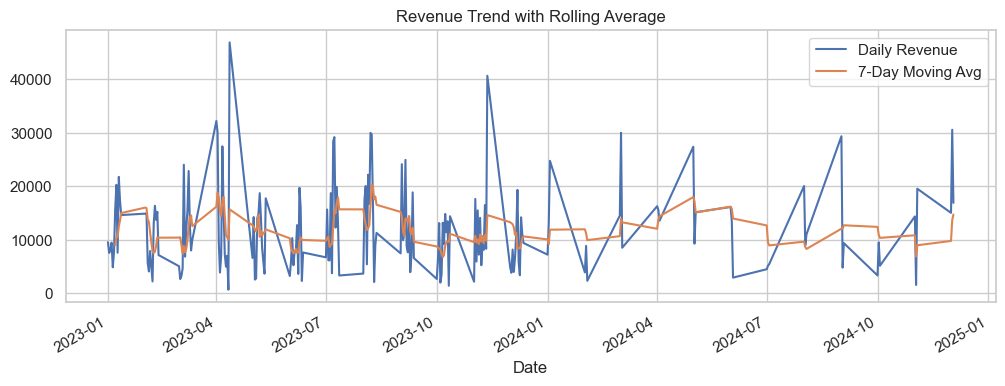

In [22]:
daily_revenue = df.groupby('Date')['Total_Amount'].sum()

plt.figure(figsize=(12,4))
daily_revenue.plot(label='Daily Revenue')
daily_revenue.rolling(7).mean().plot(label='7-Day Moving Avg')
plt.legend()
plt.title("Revenue Trend with Rolling Average")
plt.show()


Insight:
--Daily revenue is highly volatile, while the 7-day moving average reveals a more stable underlying revenue trend over time.

Why this matters:
--Short-term fluctuations can mislead performance evaluation if viewed without smoothing.

Business implication:
--Leadership should monitor rolling averages instead of daily spikes to make informed forecasting, staffing, and inventory decisions.


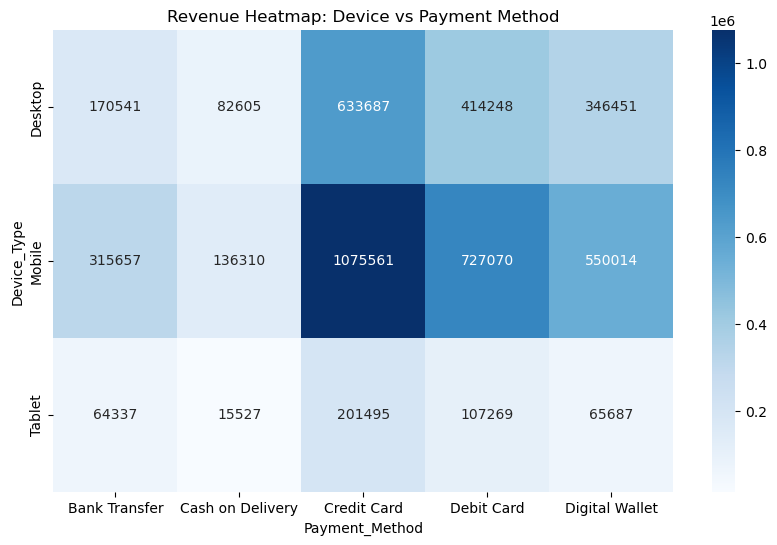

In [7]:
pivot = pd.pivot_table(
    df,
    values='Total_Amount',
    index='Device_Type',
    columns='Payment_Method',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Revenue Heatmap: Device vs Payment Method")
plt.show()


Insight:
--Mobile devices generate the highest revenue overall, particularly through credit card and debit card payments. Tablet usage contributes minimal revenue across all payment methods.

Why this matters:
--Revenue performance varies significantly by device-payment combinations rather than by individual dimensions alone.

Business implication:
--Checkout optimization and payment partnerships should focus on mobile users and card-based payments. Investment in tablet-specific UX is unlikely to yield meaningful returns.

                                                         Overall Conclusion

This analysis extends SQL-based aggregation by uncovering distributional patterns, behavioral insights, and operational trade-offs that are not visible through summary metrics alone.

Key Recommendations:

    Focus retention strategies on increasing repeat purchase frequency.

    Use median-based KPIs for revenue reporting.

    Optimize mobile checkout experience for card payments.

    Avoid assuming delivery speed directly drives customer satisfaction.